In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer



In [5]:
col_names = ['pregancies', 'glu', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv',
                 names=col_names,
                 skiprows=1)

df.head()

,pregancies,glu,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
imp = SimpleImputer(strategy='mean')
 
error_cols = col_names[1:-1]
 
df[error_cols] =df[error_cols].replace(0, np.nan)
 
for column in error_cols:
    df[column] = imp.fit_transform(df[column].values.reshape(-1, 1))
 
df
 

,pregancies,glu,bp,skin,insulin,bmi,pedigree,age,label
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1


In [8]:
features = col_names[:-1]
X = df[features]
y = df['label']
 
X

,pregancies,glu,bp,skin,insulin,bmi,pedigree,age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)
 
clf = DecisionTreeClassifier()
 
clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

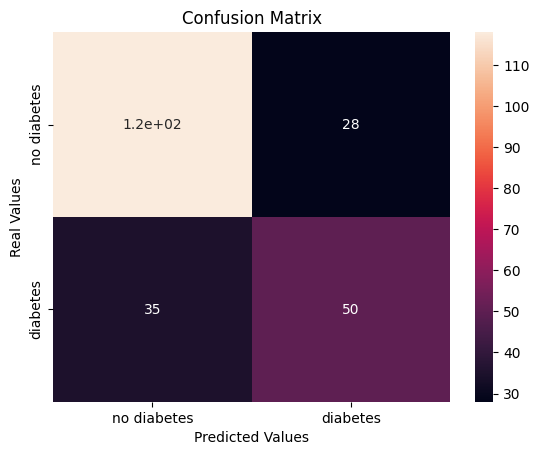

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred)

target_values = ['no diabetes', 'diabetes']

sns.heatmap(cm,
            annot=True,
            xticklabels=target_values,
            yticklabels=target_values)
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.title('Confusion Matrix')

In [12]:
print(f'Diabetes precision {51/82*100}')
print(f'Diabetes recall {51/85*100}')
 
print(f'No Diabetes precision {120/154*100}')
print(f'No Diabetes recall {120/151*100}')

Diabetes precision 62.19512195121951
Diabetes recall 60.0
No Diabetes precision 77.92207792207793
No Diabetes recall 79.47019867549669


In [13]:
from sklearn.metrics import classification_report
output_report = classification_report(y_test,
                                      y_pred,
                                      target_names=target_values,
                                      output_dict=True)
 
output_report
# accuracy is 72%

{'no diabetes': {'precision': 0.7712418300653595,
  'recall': 0.8082191780821918,
  'f1-score': 0.7892976588628763,
  'support': 146.0},
 'diabetes': {'precision': 0.6410256410256411,
  'recall': 0.5882352941176471,
  'f1-score': 0.6134969325153374,
  'support': 85.0},
 'accuracy': 0.7272727272727273,
 'macro avg': {'precision': 0.7061337355455003,
  'recall': 0.6982272360999194,
  'f1-score': 0.7013972956891068,
  'support': 231.0},
 'weighted avg': {'precision': 0.7233267821503115,
  'recall': 0.7272727272727273,
  'f1-score': 0.7246090799038252,
  'support': 231.0}}

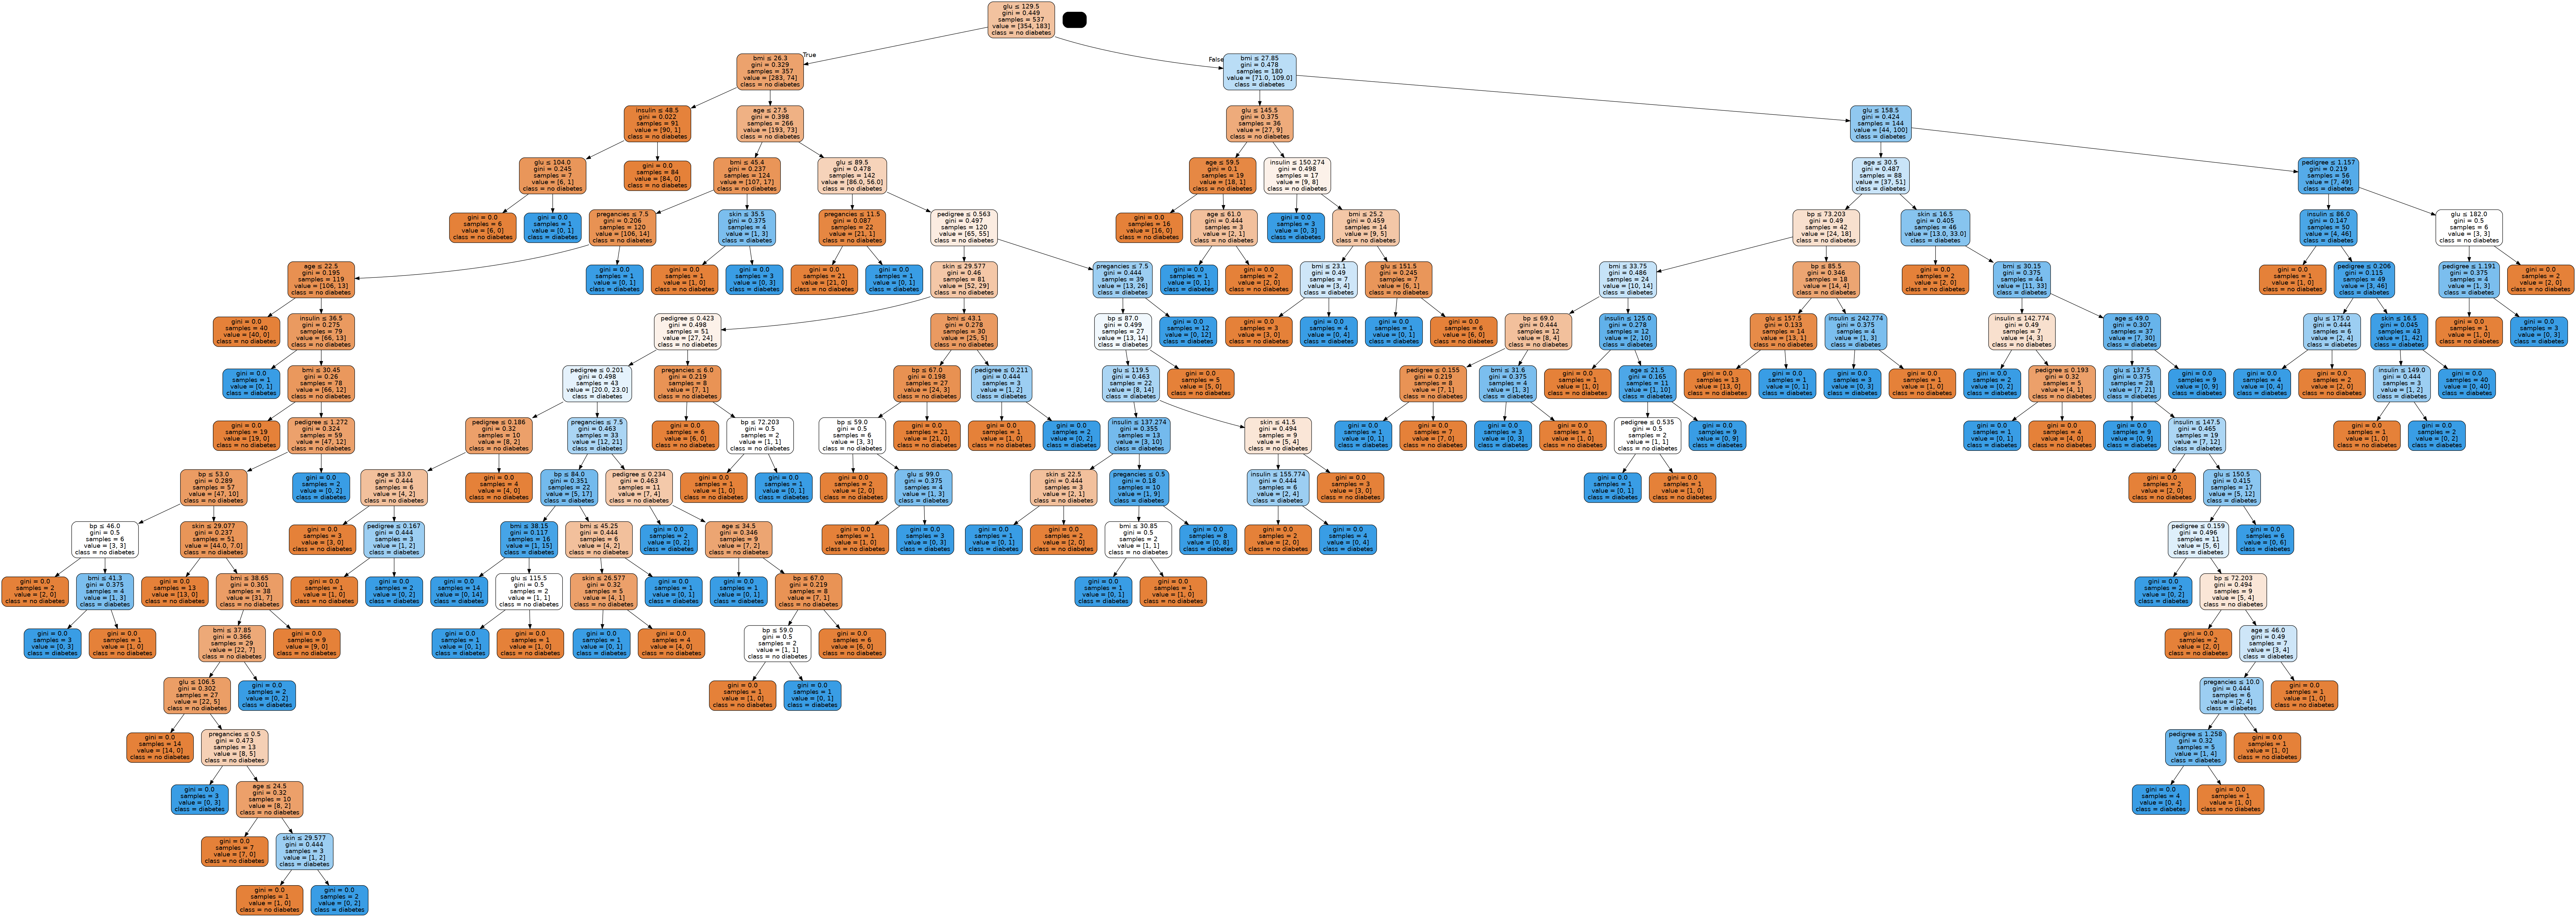

In [15]:
#pip install pydotplus
#pip install graphviz
#conda install graphviz
#I have no idea why we have to install graphviz twice, but this is how to get it to work

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=target_values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())



In [17]:
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')
 
clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)
 
print(metrics.accuracy_score(y_test, y_pred))

0.7662337662337663
